### Jupyter Notebooks y Google Colab

Jupyter Notebooks y Google Colab son herramientas similares (la segunda está basada en la primera). La diferencia más importante es que Jupyter NB permite trabajar off-line al instalarse de forma local (ej: con Anaconda) mientras que Colab permite trabajar on-line al alojarse en los servidores de Google Cloud. A manera de introducción pude ver los siguientes videos donde se muestra el funcionamiento básico de los entornos:

https://www.youtube.com/watch?v=8VFYs3Ot_aA

https://www.youtube.com/watch?v=KajSbrEBZ5kZ5k


In [2]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta Google drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')
    
    DATOS_DIR = '/content/drive/MyDrive/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    DATOS_DIR = '../MIDUSI - Teoria/Datos/'          # carpeta donde se encuentran los datasets
  

Importamos las librerías

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Accediendo a los datos

In [6]:
datos = pd.read_csv(DATOS_DIR + 'autos-mpg.csv', sep=';')

# Primeras 5 filas del dataframe
datos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,ocho,3070,130.0,3504,120,70,1,chevrolet chevelle malibu
1,15.0,ocho,3500,165.0,3693,115,70,1,buick skylark 320
2,18.0,ocho,3180,150.0,3436,110,70,1,plymouth satellite
3,16.0,ocho,3040,150.0,3433,120,70,1,amc rebel sst
4,17.0,ocho,3020,140.0,3449,105,70,1,ford torino


El método **info()** imprime información sobre el DataFrame. La información contiene el número de columnas, las etiquetas de las columnas, los tipos de datos de las columnas, el uso de la memoria, el índice de rango y el número de celdas en cada columna (valores no nulos).

In [8]:
print(datos.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    object 
 2   displacement  406 non-null    int64  
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    int64  
 6   model_year    406 non-null    int64  
 7   origin        406 non-null    int64  
 8   car_name      406 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 28.7+ KB
None




El atributo **origin** indica el país de fabricación del vehiculo: 1-USA, 2-Europa, 3-Japón. 
El método **value_counts()** indica la cantidad de autos que hay de cada tipo. Como puede verse la mayoría fue fabricado en USA.

In [10]:
datos["origin"].value_counts()


origin
1    254
3     79
2     73
Name: count, dtype: int64

In [11]:
#-- medidas estadísticas de los atributos numéricos --
datos.describe()

,mpg,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,3903.965517,105.082500,2979.413793,157.302956,75.921182,1.568966
std,7.815984,3035.047751,38.768779,847.004328,48.293591,3.748737,0.797479
min,9.000000,1000.000000,46.000000,1613.000000,80.000000,70.000000,1.000000
25%,17.500000,1460.000000,75.750000,2226.500000,137.250000,73.000000,1.000000
50%,23.000000,2620.000000,95.000000,2822.500000,155.000000,76.000000,1.000000
75%,29.000000,4505.000000,130.000000,3618.250000,172.000000,79.000000,2.000000
max,46.600000,9800.000000,230.000000,5140.000000,950.000000,82.000000,3.000000


In [12]:
#-- medidas estadísticas de los atributos cualitativos --
datos[["cylinders", "car_name"]].describe()

,cylinders,car_name
count,406,406
unique,5,312
top,cuatro,ford pinto
freq,207,6


In [13]:
# Analizando un atributo específico
col = 'acceleration'
min = datos[col].min()
max = datos[col].max()
median = datos[col].median()
mode = datos[col].mode()[0]
midrange = (max - min)/2
print(col,min, max, median, mode, midrange)

acceleration 80 950 155.0 145 435.0


### Calculando medidas de tendencia central

In [15]:
def getCentralTendency(col):
    min_val = datos[col].min()
    max_val = datos[col].max()
    median = datos[col].median()
    mode = datos[col].mode()[0] if not datos[col].mode().empty else None
    midrange = (max_val + min_val) / 2  # Ajustado para ser el punto medio real

    return pd.DataFrame({
        "Atributo": [col],
        "Min": [min_val],
        "Max": [max_val],
        "Mediana": [median],
        "Moda": [mode],
        "Rango_medio": [midrange]
    })

# Concatenamos los resultados en un solo DataFrame
stats_df = pd.concat([getCentralTendency(col) for col in datos.columns[[0,2,3,4,5]]], ignore_index=True)

# Mostramos el resultado de forma ordenada
print(stats_df)


       Atributo     Min     Max  Mediana    Moda  Rango_medio
0           mpg     9.0    46.6     23.0    13.0         27.8
1  displacement  1000.0  9800.0   2620.0  9700.0       5400.0
2    horsepower    46.0   230.0     95.0   150.0        138.0
3        weight  1613.0  5140.0   2822.5  1985.0       3376.5
4  acceleration    80.0   950.0    155.0   145.0        515.0


### Calculando medidas de dispersión

In [17]:
def getDispersion(col):
    range_val = datos[col].max() - datos[col].min()
    quantiles = datos[col].quantile([0.25, 0.5, 0.75])
    IQR = quantiles[0.75] - quantiles[0.25]
    var = datos[col].var()
    std = datos[col].std()

    print(f"{col.ljust(15)} {str(range_val).ljust(10)} {str(quantiles[0.25]).ljust(10)} {str(quantiles[0.5]).ljust(10)} "
          f"{str(quantiles[0.75]).ljust(10)} {str(IQR).ljust(10)} {str(var).ljust(20)} {str(std).ljust(10)}")

# Imprimir encabezados
print(f"{'Atributo'.ljust(15)} {'Rango'.ljust(10)} {'Q1'.ljust(10)} {'Q2'.ljust(10)} {'Q3'.ljust(10)} {'IQR'.ljust(10)} {'Varianza'.ljust(20)} {'Desv.Std'.ljust(10)}")
print("-" * 110)  # Línea separadora

# Recorrer las columnas e imprimir valores en formato tabular
for col in datos.columns[2:6]:
    getDispersion(col)


Atributo        Rango      Q1         Q2         Q3         IQR        Varianza             Desv.Std  
--------------------------------------------------------------------------------------------------------------
displacement    8800       1460.0     2620.0     4505.0     3045.0     9211514.853128998    3035.047751375421
horsepower      184.0      75.75      95.0       130.0      54.25      1503.0182393483724   38.76877918310522
weight          3527       2226.5     2822.5     3618.25    1391.75    717416.3320561941    847.0043282393509
acceleration    870        137.25     155.0      172.0      34.75      2332.270954205434    48.29359123326235


### Representaciones gráficas

<Axes: ylabel='Cylinders'>

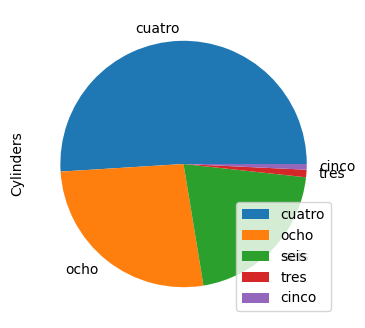

In [19]:
df2 = pd.DataFrame({"Cylinders" : datos['cylinders'].value_counts()})
df2.plot.pie(y= "Cylinders", figsize = (6,4))

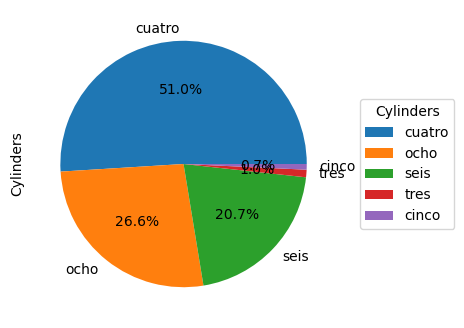

In [20]:
df2 = pd.DataFrame({"Cylinders": datos['cylinders'].value_counts()})
ax = df2.plot.pie(y="Cylinders", figsize=(6, 4), autopct='%1.1f%%', legend=False)

# Agregar la leyenda fuera del gráfico
plt.legend(title="Cylinders", bbox_to_anchor=(1.05, 0.5), loc="center left")

plt.show()

Text(0, 0.5, 'Frecuencia')

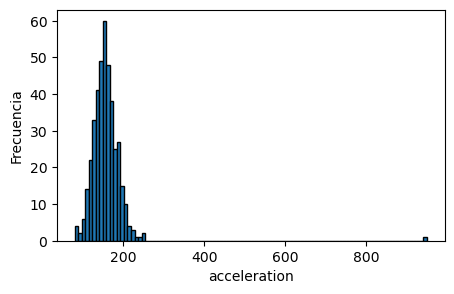

In [21]:
#-- histograma del atributo indicado en COL --
col = "acceleration"
plt.figure(figsize = (5,3))
plt.hist(datos[col], bins = 100, edgecolor = 'black', \
         linewidth=1)
plt.xlabel(col)
plt.ylabel('Frecuencia')

<Axes: >

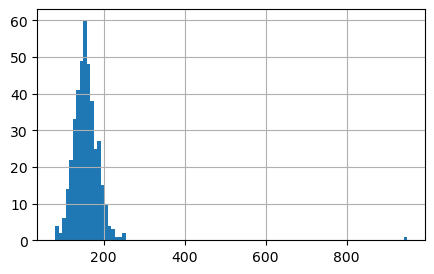

In [22]:
datos['acceleration'].hist(bins=100, figsize = (5,3))

In [ ]:
#-- representando variables numéricas con la librer{ia seaborn --
seleccion = datos[["mpg", "displacement", "horsepower", "weight", "acceleration"]]
plt.figure()
sns.pairplot(seleccion, height=2, aspect=1)
plt.show()

### Matriz de correlación

In [ ]:
# Calculamos la matriz de correlación utilizando algunos atributos numéricos
corr_matrix = datos[['mpg','displacement','horsepower','weight','acceleration']].corr()
print(corr_matrix)

### Diagrama de dispersión

El valor del coeficiente de correlación entre los atributos "mpg" y "horsepower" es -0.778427

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(datos['mpg'], datos['horsepower'])
plt.show

En el siguiente diagrama de dispersión puede verse que los autos con mayor rendimiento en millas por galón son los que tienen menor potencia de motor y tienen valor de origen=3 es decir que fueron fabricados en Japón. 

In [ ]:
plt.figure(figsize=(6, 4))
scatter = plt.scatter(datos['mpg'], datos['horsepower'], c=datos['origin'], cmap='viridis', alpha=0.7)

# Agregar barra de colores con etiquetas
cbar = plt.colorbar(scatter)
cbar.set_label("Origin")

# Etiquetas de ejes
plt.xlabel("MPG")
plt.ylabel("Horsepower")
